# Taller Clase 8
### Nicolás Danies y Daniel Bahamon

En primer lugar cargamos nuestros datos y definimos nuestra porción de train y test

In [1]:
library(MASS)

data=Boston
dim(data)
head(data)
#?Boston

train=data[1:400,]
test=data[401:506,]

[1] 506  14

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


A continuación definimos nuestro mse a partir del modelo original con una regresión simple

In [3]:
l=lm(medv~.,data=train)
pred=predict(l,test)
mseOrig=mean((test$medv-pred)^2)
mseOrig

[1] 37.89378

Siguiendo, pasamos a ralizar selección exhaustiva

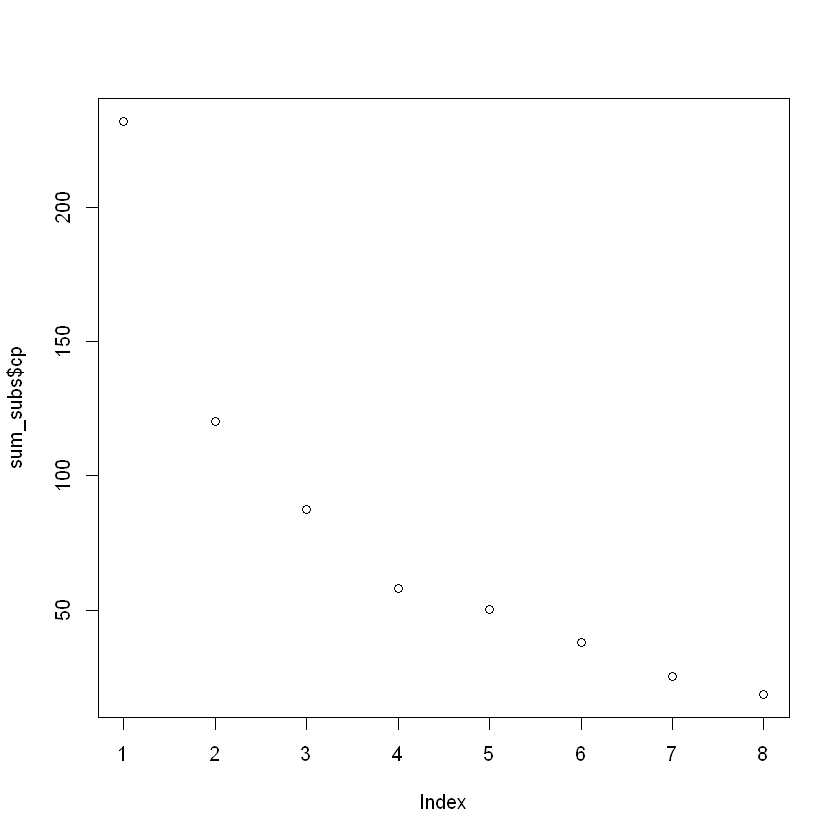

In [9]:
#install.packages("leaps")
library("leaps")
subs=regsubsets(medv~.,train)
sum_subs=summary(subs)
plot(sum_subs$cp)

In [12]:
print("minimo")
which.min(sum_subs$cp)
sum_subs

#Tomamos aquellos valores que tengan el asterísco
lm1=lm(medv~crim+nox+rm+dis+rad+tax+ptratio+lstat,data=train)
summary(lm1)
pred=predict(lm1,test)
mseExhaustivo=mean((test$medv-pred)^2)
mseExhaustivo

[1] "minimo"


[1] 8

Subset selection object
Call: regsubsets.formula(medv ~ ., train)
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   " "  
2  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 ) " "  " " " "   " "  " " "*" " " "*" " " " " "*"     " "   "*"  
5  ( 1 ) " "  " " " "   " "  "*" "*" " " "*" " " " " "*"     " "   "*"


Call:
lm(formula = medv ~ crim + nox + rm + dis + rad + tax + ptratio + 
    lstat, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7755  -2.7036  -0.6874   1.9494  25.2424 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.229446   5.630924   5.013 8.13e-07 ***
crim         -0.194477   0.054195  -3.588 0.000375 ***
nox         -14.282869   4.052880  -3.524 0.000475 ***
rm            5.126184   0.465035  11.023  < 2e-16 ***
dis          -1.061928   0.174839  -6.074 2.96e-09 ***
rad           0.477006   0.084049   5.675 2.70e-08 ***
tax          -0.012205   0.004175  -2.923 0.003665 ** 
ptratio      -0.951427   0.130367  -7.298 1.64e-12 ***
lstat        -0.512075   0.055616  -9.207  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.865 on 391 degrees of freedom
Multiple R-squared:  0.7239,	Adjusted R-squared:  0.7183 
F-statistic: 128.1 on 8 and 391 DF,  p-value: < 2

[1] 39.99998

Se continúa con la selección forward

[1] 8

Subset selection object
Call: regsubsets.formula(medv ~ ., train, method = "forward")
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   " "  
2  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 ) " "  " " " "   " "  " " "*" " " "*" " " " " "*"     " "   "*"  
5  ( 1 ) " "  " " " "   " "  "*" "*" " " "*" " " " " 

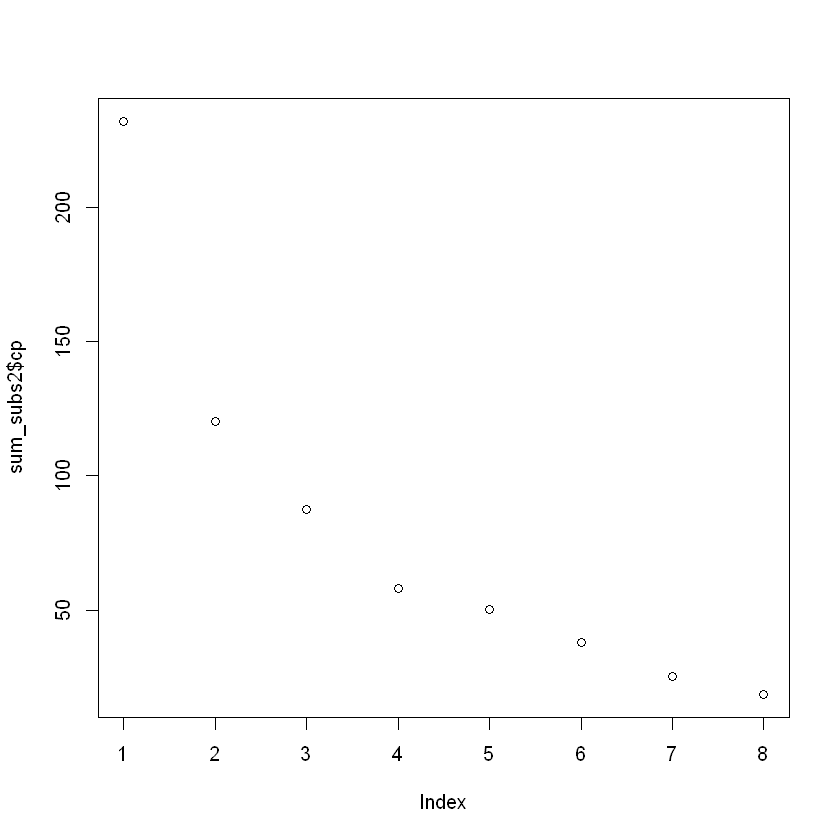

In [13]:
reg_subset=regsubsets(medv~.,train,method="forward")
sum_subs2=summary(reg_subset)
plot(sum_subs2$cp)
which.min(sum_subs2$cp)
sum_subs2

Tomamos aquellos valores que tienen asteríscos

In [16]:
lm2=lm(medv~crim+nox+rm+dis+rad+tax+ptratio+lstat,data=train)
summary(lm2)
pred=predict(lm2,test)
mseForward=mean((test$medv-pred)^2)
mseForward


Call:
lm(formula = medv ~ crim + nox + rm + dis + rad + tax + ptratio + 
    lstat, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7755  -2.7036  -0.6874   1.9494  25.2424 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.229446   5.630924   5.013 8.13e-07 ***
crim         -0.194477   0.054195  -3.588 0.000375 ***
nox         -14.282869   4.052880  -3.524 0.000475 ***
rm            5.126184   0.465035  11.023  < 2e-16 ***
dis          -1.061928   0.174839  -6.074 2.96e-09 ***
rad           0.477006   0.084049   5.675 2.70e-08 ***
tax          -0.012205   0.004175  -2.923 0.003665 ** 
ptratio      -0.951427   0.130367  -7.298 1.64e-12 ***
lstat        -0.512075   0.055616  -9.207  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.865 on 391 degrees of freedom
Multiple R-squared:  0.7239,	Adjusted R-squared:  0.7183 
F-statistic: 128.1 on 8 and 391 DF,  p-value: < 2

[1] 39.99998

In [24]:
library(pls)

lmPCR=pcr(medv~.,data=train,scale=T,validation="CV")
summary(lmPCR)
predPCR=predict(lmPCR,test)
msePCR=mean((test$medv-predPCR)^2)
msePCR

Data: 	X dimension: 400 13 
	Y dimension: 400 1
Fit method: svdpc
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           9.178    8.066    7.752    5.798    5.676    5.492    5.244
adjCV        9.178    8.062    7.740    5.786    5.664    5.477    5.230
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       5.250    5.265    5.295     5.347     5.424     5.261     5.051
adjCV    5.237    5.251    5.279     5.330     5.399     5.238     5.033

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       42.01    54.02    64.73    72.82    79.58    85.08    89.02    92.17
medv    23.56    32.05    61.79    64.67    66.80    69.67    70.14    70.14
      9 comps  10 comps  11 comps  12 comps  13 comps
X       94.84     96.48     97.98     99.23    100.00
medv    70.15     70.54     

[1] 27.42674

### Ahora seguimos con el PLSR

In [23]:
lmPLSR=plsr(medv~.,data=train,scale=T,validation="CV")
summary(lmPLSR)
predPLSR=predict(lmPLSR,test)
msePLSR=mean((test$medv-predPLSR)^2)
msePLSR

Data: 	X dimension: 400 13 
	Y dimension: 400 1
Fit method: kernelpls
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           9.178    6.807    5.182    5.097    5.038    4.990    4.965
adjCV        9.178    6.800    5.173    5.084    5.026    4.975    4.951
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       4.938    4.928    4.927     4.931     4.930     4.930     4.930
adjCV    4.926    4.917    4.916     4.920     4.919     4.919     4.919

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       38.64    52.64    59.84    67.12    72.56    78.64    82.89    86.75
medv    46.32    69.90    71.66    72.49    73.15    73.29    73.35    73.38
      9 comps  10 comps  11 comps  12 comps  13 comps
X       91.20     92.75     95.36     97.46    100.00
medv    73.38     73.38 

[1] 34.28903

### Ahora seguimos con Ridge

[1] 0.6892293

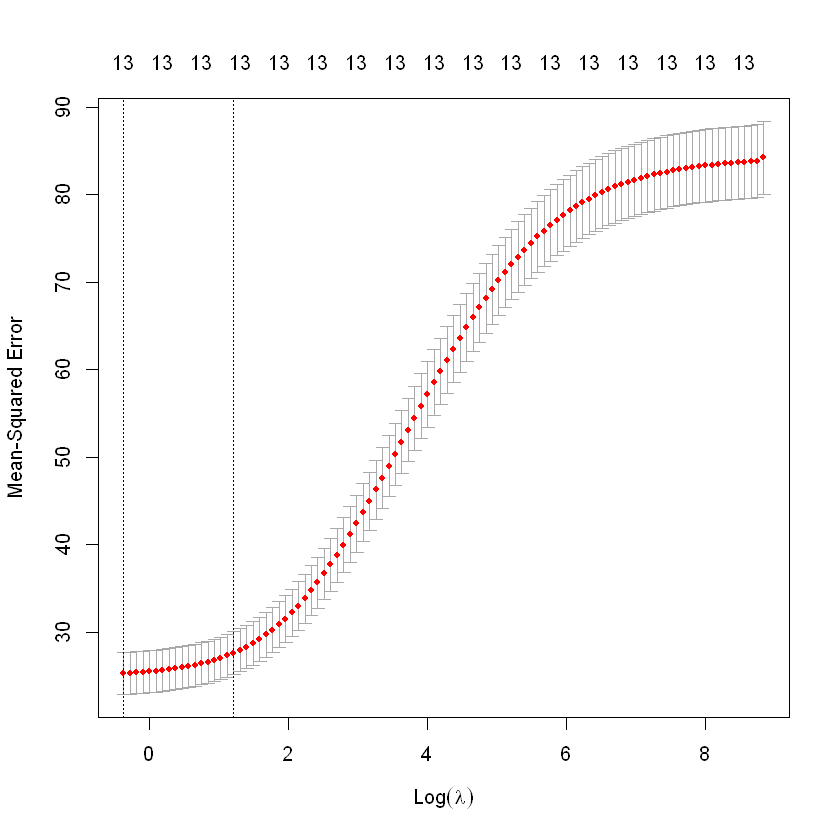

In [28]:
library(glmnet)

X=model.matrix(medv~.,train)[,-1]
Xtest=model.matrix(medv~.,test)[,-1]

y=train$medv
ytest=test$medv

cvmod=cv.glmnet(X,y,alpha=0)
cvmod$lambda.min
plot(cvmod)

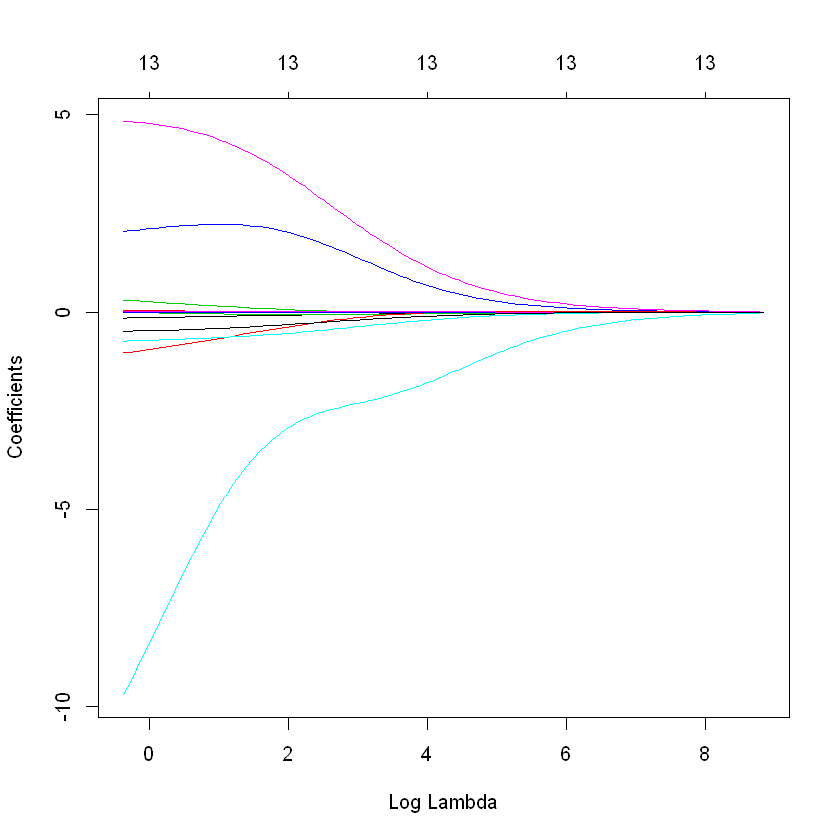

In [29]:
#Grafico de betas
mod_pen2_plot=glmnet(X,y,alpha=0)
plot(mod_pen2_plot,xvar=c("lambda"))
#plot(mod_pen2_plot,xvar=c("dev"))

In [31]:
mod_pen2=glmnet(X,y,alpha=0,lambda=cvmod$lambda.min)
coef(mod_pen2)

predp2=predict(mod_pen2,Xtest)
mseRidge=mean((ytest-predp2)^2)
mseRidge

14 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept) 21.8678732085
crim        -0.1533509018
zn           0.0334091760
indus       -0.0054674504
chas         2.0434278288
nox         -9.7516646205
rm           4.8349168432
age         -0.0006963769
dis         -1.0380460304
rad          0.3030550196
tax         -0.0083880671
ptratio     -0.7363454027
black        0.0018538005
lstat       -0.4846058291

[1] 30.2611

### Seguimos con Lasso

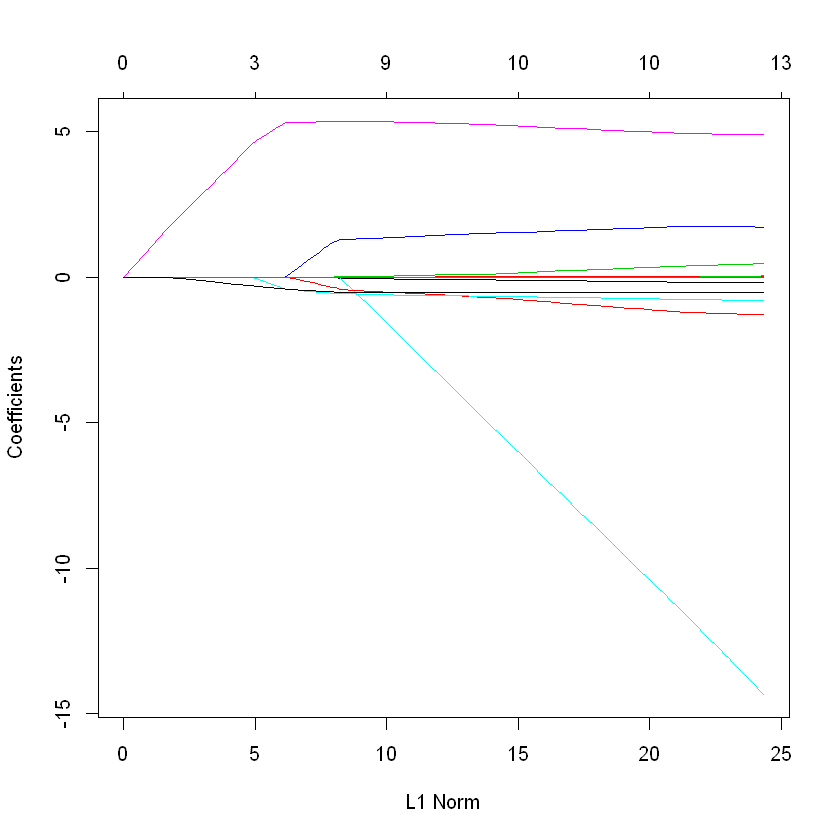

In [32]:
mod1=glmnet(X,y,alpha=1)
plot(mod1)


[1] 0.0343031

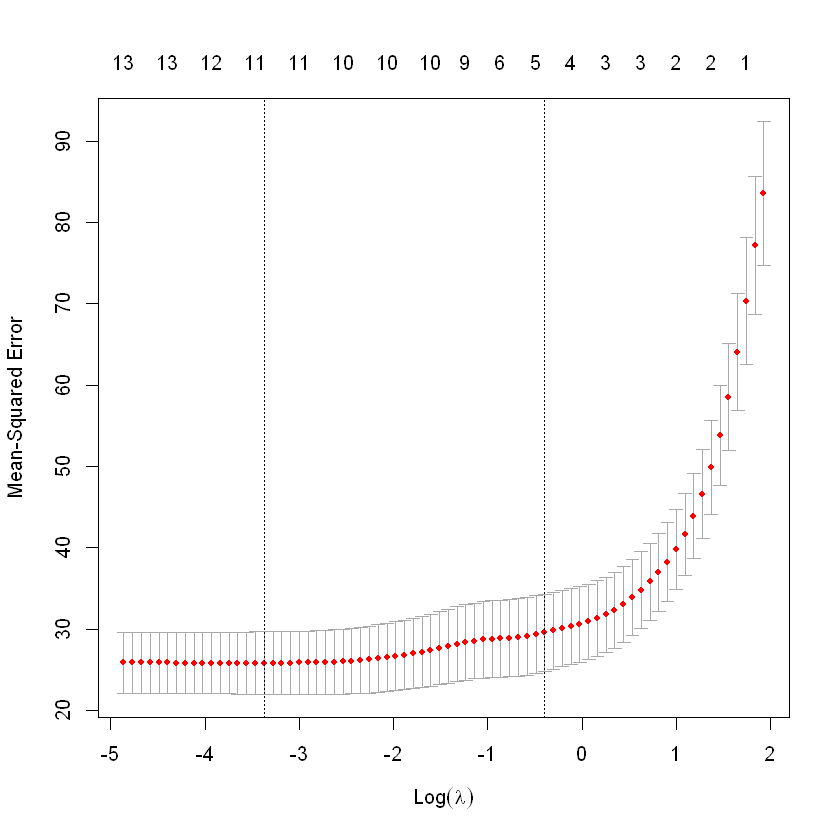

In [33]:
cvmod1=cv.glmnet(X,y,alpha=1)
cvmod1$lambda.min
plot(cvmod1)

In [34]:
mod_pen1=glmnet(X,y,alpha=1,lambda=cvmod1$lambda.min)
coef(mod_pen1)

predp1=predict(mod_pen1,Xtest)
mseLasso=mean((ytest-predp1)^2)
mseLasso

14 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  25.78535959
crim         -0.17671421
zn            0.03930053
indus         0.01929590
chas          1.73650418
nox         -12.61498201
rm            4.92751156
age           .         
dis          -1.23507626
rad           0.42057367
tax          -0.01267867
ptratio      -0.77615618
black         .         
lstat        -0.51211713

[1] 35.27878

### Finalmente realizamos Elastic Net

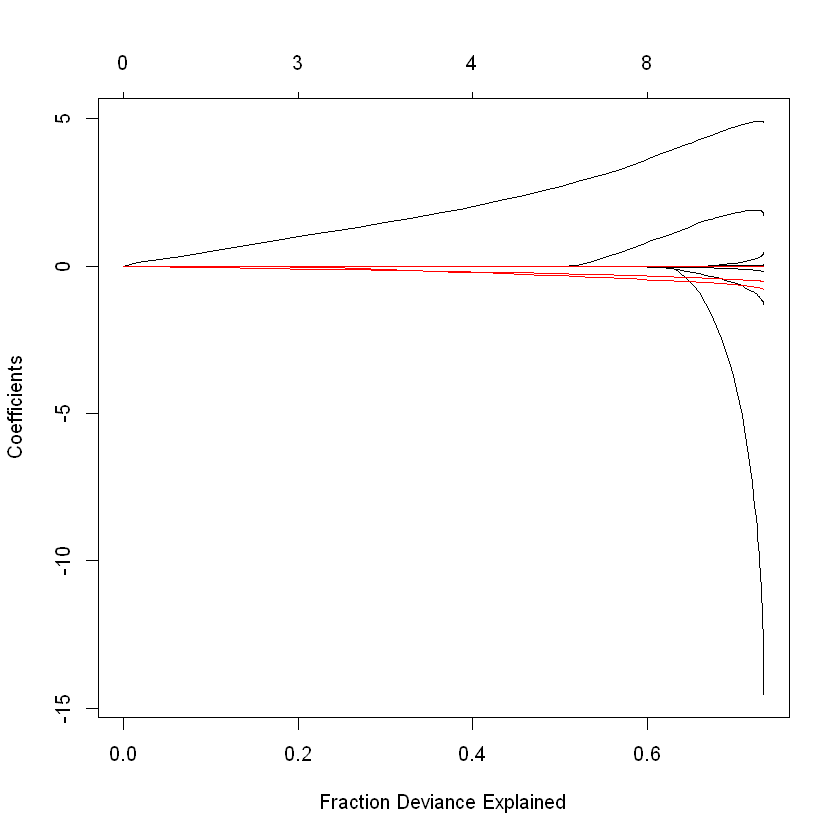

In [50]:
enet=glmnet(X,y,alpha=0.2)
plot(enet,"dev",
     col=c(rep(1,10),rep(2,10),rep(3,10),rep(4,10),rep(5,10)))

In [51]:
enet=glmnet(X,y,lambda=exp(1),alpha=0.2)

predp2=predict(enet,Xtest)
mseElastic=mean((ytest-predp2)^2)
mseElastic

[1] 33.08025

In [36]:

enet=glmnet(X,y,alpha=0.1)
#plot(enet,"dev",col=c(rep(1,10),rep(2,10),rep(3,10),rep(4,10),rep(5,10)))
enet=glmnet(X,y,lambda=exp(1),alpha=0.2)
benet=enet$beta
#benet

predp2=predict(enet,Xtest)
mseElastic=mean((ytest-predp2)^2)
#mseElastic

13 x 1 sparse Matrix of class "dgCMatrix"
                 s0
crim    -0.01386444
zn       .         
indus    .         
chas     1.00076487
nox      .         
rm       4.56227317
age      .         
dis     -0.09791170
rad      .         
tax      .         
ptratio -0.51948082
black    .         
lstat   -0.41037435

[1] 33.08025

# El mejor MSE es de PCR